In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import time
import warnings
warnings.filterwarnings('ignore')

In [60]:
global_temp_country = pd.read_csv('/home/samim/global/GlobalLandTemperaturesByCountry.csv')
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [61]:
global_temp_country.shape

(577462, 4)

In [62]:
global_temp_country.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [63]:
global_temp_country.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

### axis{0 or ‘index’, 1 or ‘columns’}, default 0

### how{‘any’, ‘all’}, default ‘any’.    

### ‘any’ : If any NA values are present, drop that row or column.  ‘all’ : If all values are NA, drop that row or column.

### subset: column label or sequence of labels, optional.  if you are dropping rows these would be a list of columns to include.

### ignore_index:   bool, default False..

### If True, the resulting axis will be labeled 0, 1, …, n - 1.

In [64]:
global_temp_country.dropna(axis='index',how='any',subset=['AverageTemperature'],inplace=True)

In [65]:
global_temp_country.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [66]:
global_temp_country.shape

(544811, 4)

In [67]:
577462 - 544811

32651

In [68]:
global_temp_country['Country'].nunique()

242

In [69]:
global_temp_country['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [70]:
dict = {
    'Congo (Democratic Republic Of The)': 'Congo',
    'Denmark (Europe)': 'Denmark',
    'Falkland Islands (Islas Malvinas)': 'Falkland Islands',
    'France (Europe)':'France',
    'Netherlands (Europe)': 'Netherlands',
    'United Kingdom (Europe)': 'United Kingdom'
    }


global_temp_country['Country'].replace(dict,inplace=True)    

In [71]:
global_temp_country['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
     

In [72]:
global_temp_country.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

###  see index is 'Country'. due to groupby()

In [73]:
global_temp_country.groupby(['Country'])['AverageTemperature'].mean().to_frame()  # see index is 'Country'

,AverageTemperature
Country,
Afghanistan,14.045007
Africa,24.074203
Albania,12.610646
Algeria,22.985112
American Samoa,26.611965
...,...
Western Sahara,22.319818
Yemen,26.253597
Zambia,21.282956


### to_frame() make it dataframe.and mean() gives average.  reset_index() make index and as country is index due to groupby() so reset it.

In [74]:
avg_temp = global_temp_country.groupby(['Country'])['AverageTemperature'].mean().to_frame().reset_index()   #to_frame() make it dataframe.and mean() gives average.
avg_temp
#reset_index() make index and as country is index due to groupby() so reset it.

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965
...,...,...
232,Western Sahara,22.319818
233,Yemen,26.253597
234,Zambia,21.282956
235,Zimbabwe,21.117547


## A choropleth map is a thematic map that is used to represent statistical data using the color mapping symbology technique. It displays enumeration units, or divided geographical areas or regions that are colored, shaded or patterned in relation to a data variable.

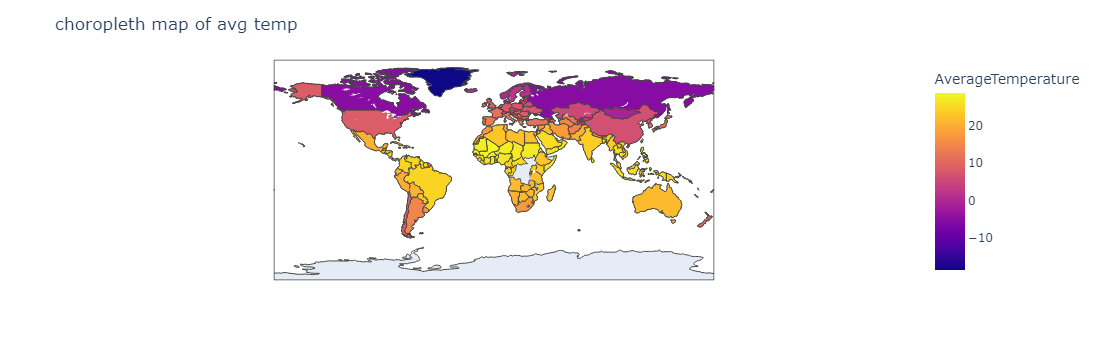

In [75]:
fig = px.choropleth(avg_temp,locations='Country',locationmode='country names',color='AverageTemperature')
fig.update_layout(title='choropleth map of avg temp')
fig.show()

In [76]:
global_temp = pd.read_csv('/home/samim/global/GlobalTemperatures.csv')
global_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [77]:
global_temp['dt'][0]

'1750-01-01'

In [78]:
global_temp['dt'].iloc[0]

'1750-01-01'

In [79]:
global_temp['dt'][0].split('-')

['1750', '01', '01']

In [80]:
global_temp['dt'][0].split('-')[0]

'1750'

In [81]:
global_temp['dt'][0].split('-')[1]

'01'

In [82]:
global_temp['dt'][0].split('-')[2]

'01'

In [83]:
global_temp['dt']

0       1750-01-01
1       1750-02-01
2       1750-03-01
3       1750-04-01
4       1750-05-01
           ...    
3187    2015-08-01
3188    2015-09-01
3189    2015-10-01
3190    2015-11-01
3191    2015-12-01
Name: dt, Length: 3192, dtype: object

In [84]:
type(global_temp['dt'])

pandas.core.series.Series

In [85]:
def fetch_year(date):
    return date.split('-')[0]

print(global_temp['dt'].apply(fetch_year))
global_temp['years'] = global_temp['dt'].apply(fetch_year)  # apply()  call the function fetch_year
global_temp.head()

0       1750
1       1750
2       1750
3       1750
4       1750
        ... 
3187    2015
3188    2015
3189    2015
3190    2015
3191    2015
Name: dt, Length: 3192, dtype: object


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


## agg: aggregate function did here two columns mean and reset_index reset index as groupby() did years as index.

In [90]:
data = global_temp.groupby('years').agg({'LandAverageTemperature': 'mean', 'LandAverageTemperatureUncertainty': 'mean'}).reset_index()
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [91]:
data['uncertainity Top'] = data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['uncertainity Bottom'] = data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,uncertainity Top,uncertainity Bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [92]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'uncertainity Top', 'uncertainity Bottom'],
      dtype='object')

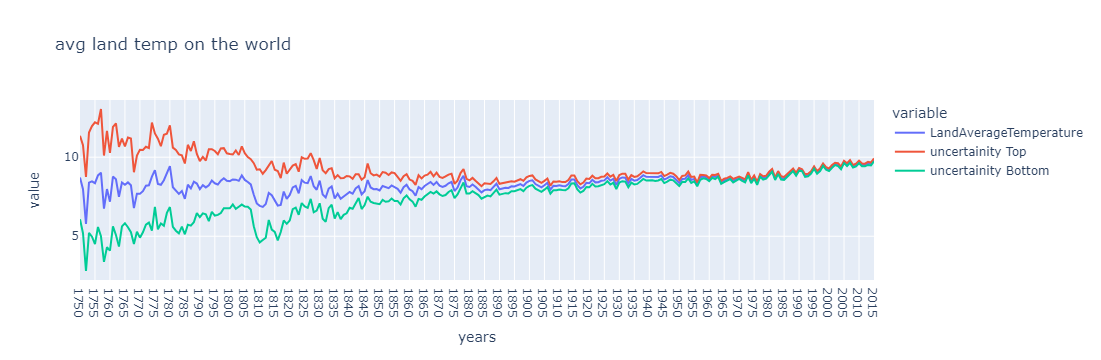

In [94]:
fig = px.line(data, x='years', y= ['LandAverageTemperature',
       'uncertainity Top', 'uncertainity Bottom'],title='avg land temp on the world')
fig.show()

### This graph shows that 2000-2015 years the land temp increasing. 

# Avg temp of each season?

### In this dataframe no season present. so how to do it?

In [95]:
global_temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'years'],
      dtype='object')

In [96]:
global_temp['dt'].dtype

dtype('O')

In [98]:
 pd.to_datetime(global_temp['dt'])

0      1750-01-01
1      1750-02-01
2      1750-03-01
3      1750-04-01
4      1750-05-01
          ...    
3187   2015-08-01
3188   2015-09-01
3189   2015-10-01
3190   2015-11-01
3191   2015-12-01
Name: dt, Length: 3192, dtype: datetime64[ns]

In [99]:
 pd.to_datetime(global_temp['dt']).dt.month

0        1
1        2
2        3
3        4
4        5
        ..
3187     8
3188     9
3189    10
3190    11
3191    12
Name: dt, Length: 3192, dtype: int32

In [100]:
global_temp['month'] =  pd.to_datetime(global_temp['dt']).dt.month
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [102]:
def get_season(month):
    if month>=3 and month<=5:
        return 'spring'
    elif month>=6 and month<=8:
        return 'summer'
    elif month>=9 and month<=11:
        return 'autumn'
    else:
        return 'winter'

global_temp['season'] = global_temp['month'].apply(get_season)
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [108]:
years = global_temp['years'].unique()
years

array(['1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757',
       '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765',
       '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773',
       '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781',
       '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789',
       '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797',
       '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813',
       '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821',
       '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829',
       '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837',
       '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
      

In [111]:
global_temp[global_temp['years'] == '2015']

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
3180,2015-01-01,3.881,0.130,9.432,0.090,-1.518,0.097,14.255,0.066,2015,1,winter
3181,2015-02-01,4.664,0.121,10.497,0.092,-1.138,0.113,14.564,0.067,2015,2,winter
3182,2015-03-01,6.740,0.060,12.659,0.096,0.894,0.079,15.193,0.061,2015,3,spring
3183,2015-04-01,9.313,0.088,15.224,0.137,3.402,0.147,15.962,0.061,2015,4,spring
3184,2015-05-01,12.312,0.081,18.181,0.117,6.313,0.153,16.774,0.058,2015,5,spring
3185,2015-06-01,14.505,0.068,20.364,0.133,8.627,0.168,17.390,0.057,2015,6,summer
3186,2015-07-01,15.051,0.086,20.904,0.109,9.326,0.225,17.611,0.058,2015,7,summer
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015,8,summer
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015,9,autumn
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015,10,autumn


In [115]:
for year in years:
    current_df = global_temp[global_temp['years'] == year]
current_df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
3180,2015-01-01,3.881,0.130,9.432,0.090,-1.518,0.097,14.255,0.066,2015,1,winter
3181,2015-02-01,4.664,0.121,10.497,0.092,-1.138,0.113,14.564,0.067,2015,2,winter
3182,2015-03-01,6.740,0.060,12.659,0.096,0.894,0.079,15.193,0.061,2015,3,spring
3183,2015-04-01,9.313,0.088,15.224,0.137,3.402,0.147,15.962,0.061,2015,4,spring
3184,2015-05-01,12.312,0.081,18.181,0.117,6.313,0.153,16.774,0.058,2015,5,spring
3185,2015-06-01,14.505,0.068,20.364,0.133,8.627,0.168,17.390,0.057,2015,6,summer
3186,2015-07-01,15.051,0.086,20.904,0.109,9.326,0.225,17.611,0.058,2015,7,summer
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015,8,summer
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015,9,autumn
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015,10,autumn


In [116]:
spring_temps = []
summer_temps = []
winter_temps = []
autumn_temps = []

for year in years:
    current_df = global_temp[global_temp['years'] == year]
    spring_temps.append(current_df[current_df['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_df[current_df['season'] == 'summer']['LandAverageTemperature'].mean())
    winter_temps.append(current_df[current_df['season'] == 'winter']['LandAverageTemperature'].mean())
    autumn_temps.append(current_df[current_df['season'] == 'autumn']['LandAverageTemperature'].mean())

spring_temps

[8.563,
 6.734999999999999,
 7.035499999999999,
 8.627333333333334,
 9.074333333333334,
 8.583666666666666,
 9.466,
 8.604666666666667,
 6.896666666666666,
 6.897333333333333,
 6.653666666666666,
 8.916,
 7.809333333333332,
 6.716,
 8.192,
 8.868666666666668,
 8.432333333333332,
 7.831,
 6.144000000000001,
 8.803333333333333,
 7.132000000000001,
 6.0523333333333325,
 7.148666666666666,
 8.866999999999999,
 10.607,
 9.036666666666667,
 7.522333333333333,
 7.774333333333334,
 8.957999999999998,
 10.370666666666667,
 11.737666666666664,
 7.599,
 7.390999999999998,
 8.397333333333334,
 7.3580000000000005,
 6.173666666666667,
 8.849666666666666,
 7.9576666666666656,
 8.159333333333334,
 7.783,
 6.997333333333333,
 7.9253333333333345,
 7.914666666666666,
 8.248,
 9.146333333333333,
 8.552,
 7.507666666666666,
 7.024333333333334,
 8.953333333333333,
 8.041666666666666,
 8.224666666666666,
 8.660666666666666,
 7.760333333333333,
 8.653666666666666,
 8.863,
 8.328999999999999,
 8.07533333333333

### Let create a DataFrame

In [117]:
season = pd.DataFrame()

In [118]:
season['year']= years
season['spring_temps']= spring_temps
season['summer_temps']= summer_temps
season['winter_temps']= winter_temps
season['autumn_temps']= autumn_temps

season.head()

,year,spring_temps,summer_temps,winter_temps,autumn_temps
0,1750,8.563000,14.518333,2.963000,8.890000
1,1751,6.735000,14.116000,1.729000,10.673000
2,1752,7.035500,NaN,2.717000,7.587000
3,1753,8.627333,14.608333,1.104333,9.212333
4,1754,9.074333,14.208333,1.637333,8.957333


In [119]:
season.columns

Index(['year', 'spring_temps', 'summer_temps', 'winter_temps', 'autumn_temps'], dtype='object')

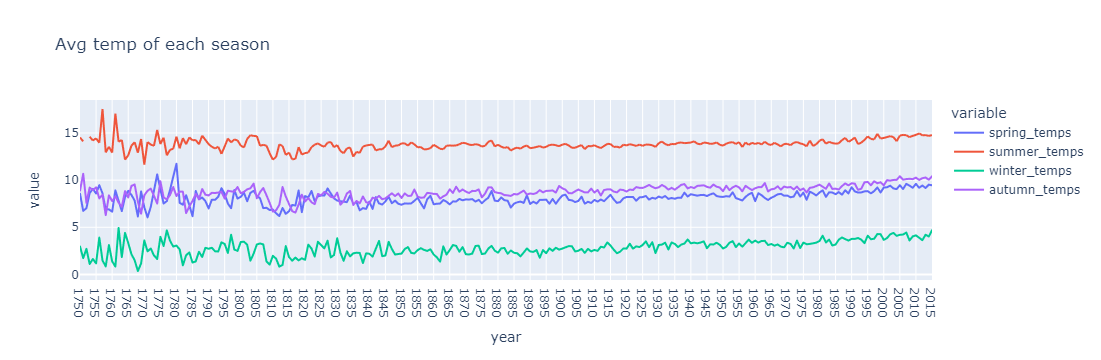

In [161]:
fig = px.line(season, x='year', y=['spring_temps', 'summer_temps', 'winter_temps', 'autumn_temps'], title='Avg temp of each season')
fig.show()

# Analyse Trend in tempature for the Top Economies?

In [122]:
continent = ['Russia', 'United States','China','Japan','Australia','India']


In [123]:
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [124]:
global_temp_country['Country'].isin(continent)

0         False
5         False
6         False
7         False
8         False
          ...  
577456    False
577457    False
577458    False
577459    False
577460    False
Name: Country, Length: 544811, dtype: bool

In [125]:
global_temp_country[global_temp_country['Country'].isin(continent)]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia
...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States
557817,2013-06-01,20.198,0.236,United States
557818,2013-07-01,22.074,0.152,United States
557819,2013-08-01,21.168,0.249,United States


In [126]:
continent_df = global_temp_country[global_temp_country['Country'].isin(continent)]
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia


In [130]:
def fetch_year(date):
    return date.split('-')[0]

continent_df['years'] = continent_df['dt'].apply(fetch_year)
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,years
34816,1852-07-01,14.116,1.530,Australia,1852
34817,1852-08-01,15.330,1.400,Australia,1852
34818,1852-09-01,18.740,1.446,Australia,1852
34819,1852-10-01,21.984,1.493,Australia,1852
34820,1852-11-01,24.073,1.466,Australia,1852


In [134]:
avg_temp = continent_df.groupby(['years','Country']).agg({'AverageTemperature': 'mean'}).reset_index()
avg_temp.head()

,years,Country,AverageTemperature
0,1768,United States,5.572750
1,1769,United States,10.446500
2,1774,United States,1.603000
3,1775,United States,9.499167
4,1776,United States,8.110000


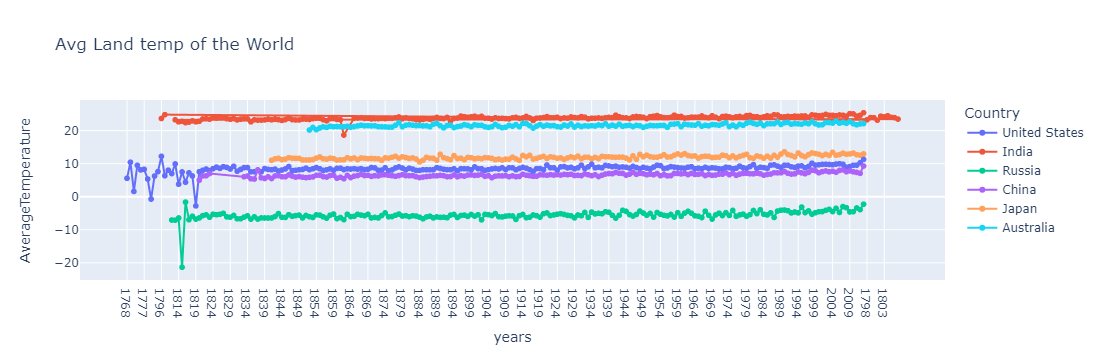

In [137]:
fig = px.line(avg_temp, x='years', y='AverageTemperature',color='Country',markers=True, title='Avg Land temp of the World')
fig.show()

## See from the graph that India Land Tempature is high, Where Australia Land Tempature is Low.

# Find out Avg Tempature of 'United State'?

In [138]:
global_temp_state = pd.read_csv('/home/samim/global/GlobalLandTemperaturesByState.csv')
global_temp_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [139]:
filter = global_temp_state['Country'] == 'United States'
filter.head()

0    False
1    False
2    False
3    False
4    False
Name: Country, dtype: bool

In [140]:
USA = global_temp_state[filter]
USA.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7459,1743-12-01,NaN,NaN,Alabama,United States
7460,1744-01-01,NaN,NaN,Alabama,United States
7461,1744-02-01,NaN,NaN,Alabama,United States
7462,1744-03-01,NaN,NaN,Alabama,United States


In [141]:
USA.dropna(inplace=True)
USA.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7463,1744-04-01,19.075,2.902,Alabama,United States
7464,1744-05-01,21.197,2.844,Alabama,United States
7465,1744-06-01,25.290,2.879,Alabama,United States
7466,1744-07-01,26.420,2.841,Alabama,United States


In [142]:
USA['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia (State)', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [143]:
dict = {'District Of Columbia': 'Columbia', 'Georgia (State)': 'Georgia'}
USA.replace(dict, inplace=True)

USA['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [144]:
USA = USA[['AverageTemperature','State']]
USA.head()

,AverageTemperature,State
7458,10.722,Alabama
7463,19.075,Alabama
7464,21.197,Alabama
7465,25.290,Alabama
7466,26.420,Alabama


In [145]:
USA_temp = USA.groupby('State')['AverageTemperature'].mean().reset_index()
USA_temp.head()

,State,AverageTemperature
0,Alabama,17.066138
1,Alaska,-4.890738
2,Arizona,15.381526
3,Arkansas,15.573963
4,California,14.327677


In [146]:
!pip install opencage

103075.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


In [147]:
from opencage.geocoder import OpenCageGeocode

In [148]:
key = '2abca76d27804dc19bb6578cb9973f0f'
geocoder = OpenCageGeocode(key)

In [150]:
location = 'Chhend, Rourkela, Odisha, India'
results = geocoder.geocode(location)
results

[{'annotations': {'DMS': {'lat': "22° 14' 27.04056'' N",
    'lng': "84° 49' 1.18056'' E"},
   'MGRS': '45QTE7501161108',
   'Maidenhead': 'NL22jf87at',
   'Mercator': {'x': 9441784.649, 'y': 2524299.903},
   'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?node=1637536116#map=17/22.24084/84.81699',
    'note_url': 'https://www.openstreetmap.org/note/new#map=17/22.24084/84.81699&layers=N',
    'url': 'https://www.openstreetmap.org/?mlat=22.24084&mlon=84.81699#map=17/22.24084/84.81699'},
   'UN_M49': {'regions': {'ASIA': '142',
     'IN': '356',
     'SOUTHERN_ASIA': '034',
     'WORLD': '001'},
    'statistical_groupings': ['LEDC']},
   'callingcode': 91,
   'currency': {'alternate_symbols': ['Rs', '৳', '૱', '௹', 'रु', '₨'],
    'decimal_mark': '.',
    'html_entity': '&#x20b9;',
    'iso_code': 'INR',
    'iso_numeric': '356',
    'name': 'Indian Rupee',
    'smallest_denomination': 50,
    'subunit': 'Paisa',
    'subunit_to_unit': 100,
    'symbol': '₹',
    'symbol_first': 1

In [151]:
results[0]['geometry']['lat']

22.2408446

In [152]:
results[0]['geometry']['lng']

84.8169946

In [153]:
USA_temp.head()

,State,AverageTemperature
0,Alabama,17.066138
1,Alaska,-4.890738
2,Arizona,15.381526
3,Arkansas,15.573963
4,California,14.327677


In [154]:
list_lat = []
list_long = []

for state in USA_temp['State']:
    results = geocoder.geocode(state)
    lat = results[0]['geometry']['lat']
    lon = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(lon)

list_lat


[33.2588817,
 64.4459613,
 34.395342,
 35.2048883,
 36.7014631,
 38.7251776,
 4.099917,
 41.6500201,
 38.6920451,
 27.7567667,
 32.3293809,
 19.5938015,
 43.6447642,
 40.0796606,
 40.3270127,
 41.9216734,
 38.27312,
 37.5726028,
 30.8703881,
 45.709097,
 39.5162401,
 42.3788774,
 43.6211955,
 45.9896587,
 32.9715285,
 38.7604815,
 47.3752671,
 41.7370229,
 39.5158825,
 43.4849133,
 40.0757384,
 34.5708167,
 40.7127281,
 35.6729639,
 47.6201461,
 40.2253569,
 34.9550817,
 43.9792797,
 40.9699889,
 41.7962409,
 33.6874388,
 44.6471761,
 35.7730076,
 31.2638905,
 39.4225192,
 44.5990718,
 37.1232245,
 38.8950368,
 38.4758406,
 44.4308975,
 43.1700264]

In [155]:
USA_temp['lat'] = list_lat
USA_temp['lon'] = list_long

USA_temp.head()

,State,AverageTemperature,lat,lon
0,Alabama,17.066138,33.258882,-86.829534
1,Alaska,-4.890738,64.445961,-149.680909
2,Arizona,15.381526,34.395342,-111.763275
3,Arkansas,15.573963,35.204888,-92.447911
4,California,14.327677,36.701463,-118.755997


In [156]:
import folium
from folium.plugins import HeatMap

In [157]:
basemap = folium.Map()
basemap

In [160]:
HeatMap(USA_temp[['lat','lon','AverageTemperature']]).add_to(basemap)
basemap

## Conclusion: The Highly Darked area is High Temp are of USA.

# How to find our Avg Tempature of Major Indian Cities By Month.?

In [162]:
cities = pd.read_csv('/home/samim/global/GlobalLandTemperaturesByCity.csv')
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [163]:
cities['Country'] == 'India'

0          False
1          False
2          False
3          False
4          False
           ...  
8599207    False
8599208    False
8599209    False
8599210    False
8599211    False
Name: Country, Length: 8599212, dtype: bool

In [185]:
india = cities[cities['Country'] == 'India']
india.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49880,1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E
49881,1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E
49882,1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E
49883,1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E
49884,1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E


In [186]:
india.shape

(1014906, 7)

In [187]:
india['City'].unique()

array(['Abohar', 'Achalpur', 'Adilabad', 'Adoni', 'Agartala', 'Agra',
       'Ahmadabad', 'Ahmadnagar', 'Aizawl', 'Ajmer', 'Akola', 'Alandur',
       'Alappuzha', 'Aligarh', 'Allahabad', 'Alwar', 'Ambala',
       'Ambarnath', 'Ambattur', 'Ambur', 'Amravati', 'Amritsar', 'Amroha',
       'Anand', 'Anantapur', 'Ara', 'Asansol', 'Aurangabad', 'Avadi',
       'Azamgarh', 'Badlapur', 'Bagaha', 'Bahadurgarh', 'Baharampur',
       'Bahraich', 'Baidyabati', 'Baleshwar', 'Ballia', 'Bally',
       'Balurghat', 'Banda', 'Bangalore', 'Bangaon', 'Bankura',
       'Bansbaria', 'Barakpur', 'Baranagar', 'Barasat', 'Barddhaman',
       'Bareli', 'Baripada', 'Barnala', 'Barsi', 'Basirhat', 'Basti',
       'Batala', 'Beawar', 'Begusarai', 'Belgaum', 'Bellary', 'Bettiah',
       'Bhadravati', 'Bhadreswar', 'Bhagalpur', 'Bharatpur', 'Bharuch',
       'Bhatpara', 'Bhavnagar', 'Bhilai', 'Bhilwara', 'Bhimavaram',
       'Bhind', 'Bhiwandi', 'Bhiwani', 'Bhopal', 'Bhubaneswar', 'Bhuj',
       'Bhusawal', 'Bid',

In [188]:
cities = ['New Delhi', 'Bangalore', 'Hyderabad', 'Pune', 'Madras', 'Varanasi', 'Gurgoan']

In [191]:
india['City'].isin(cities)

49880      False
49881      False
49882      False
49883      False
49884      False
           ...  
8385505    False
8385506    False
8385507    False
8385508    False
8385509    False
Name: City, Length: 1014906, dtype: bool

In [192]:
india[india['City'].isin(cities)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
630113,1796-01-01,22.672,2.317,Bangalore,India,12.05N,77.26E
630114,1796-02-01,24.420,1.419,Bangalore,India,12.05N,77.26E
630115,1796-03-01,26.092,2.459,Bangalore,India,12.05N,77.26E
630116,1796-04-01,27.687,1.746,Bangalore,India,12.05N,77.26E
630117,1796-05-01,27.619,1.277,Bangalore,India,12.05N,77.26E
...,...,...,...,...,...,...,...
7974691,2013-05-01,34.333,0.589,Varanasi,India,24.92N,83.35E
7974692,2013-06-01,32.044,1.033,Varanasi,India,24.92N,83.35E
7974693,2013-07-01,30.281,0.420,Varanasi,India,24.92N,83.35E
7974694,2013-08-01,29.364,0.269,Varanasi,India,24.92N,83.35E


In [193]:
cities = india[india['City'].isin(cities)]

In [194]:
cities['Latitude'] = cities['Latitude'].str.strip('N')
cities['Longitude'] = cities['Longitude'].str.strip('E')

cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
630113,1796-01-01,22.672,2.317,Bangalore,India,12.05,77.26
630114,1796-02-01,24.420,1.419,Bangalore,India,12.05,77.26
630115,1796-03-01,26.092,2.459,Bangalore,India,12.05,77.26
630116,1796-04-01,27.687,1.746,Bangalore,India,12.05,77.26
630117,1796-05-01,27.619,1.277,Bangalore,India,12.05,77.26


In [197]:
cities['dt'] = pd.to_datetime(cities['dt'])
cities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15678 entries, 630113 to 7974695
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             15678 non-null  datetime64[ns]
 1   AverageTemperature             14929 non-null  float64       
 2   AverageTemperatureUncertainty  14929 non-null  float64       
 3   City                           15678 non-null  object        
 4   Country                        15678 non-null  object        
 5   Latitude                       15678 non-null  object        
 6   Longitude                      15678 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 979.9+ KB


In [199]:
cities['Month'] = cities['dt'].dt.month
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month
630113,1796-01-01,22.672,2.317,Bangalore,India,12.05,77.26,1
630114,1796-02-01,24.420,1.419,Bangalore,India,12.05,77.26,2
630115,1796-03-01,26.092,2.459,Bangalore,India,12.05,77.26,3
630116,1796-04-01,27.687,1.746,Bangalore,India,12.05,77.26,4
630117,1796-05-01,27.619,1.277,Bangalore,India,12.05,77.26,5


In [203]:
cities.groupby(['Month', 'City'])

In [201]:
cities.groupby(['Month', 'City'])['AverageTemperature'].mean()

Month  City     
1      Bangalore    22.713981
       Hyderabad    22.758290
       Madras       24.346733
       New Delhi    14.238560
       Pune         20.448205
                      ...    
12     Hyderabad    21.892538
       Madras       24.168721
       New Delhi    15.378814
       Pune         20.253654
       Varanasi     16.246505
Name: AverageTemperature, Length: 72, dtype: float64

In [206]:
cities.groupby(['Month', 'City'])['AverageTemperature'].mean().to_frame()

AverageTemperature
Month City                         
1     Bangalore           22.713981
      Hyderabad           22.758290
      Madras              24.346733
      New Delhi           14.238560
      Pune                20.448205
...                             ...
12    Hyderabad           21.892538
      Madras              24.168721
      New Delhi           15.378814
      Pune                20.253654
      Varanasi            16.246505

[72 rows x 1 columns]

In [205]:
cities.groupby(['Month', 'City'])['AverageTemperature'].mean().to_frame().reset_index()

,Month,City,AverageTemperature
0,1,Bangalore,22.713981
1,1,Hyderabad,22.758290
2,1,Madras,24.346733
3,1,New Delhi,14.238560
4,1,Pune,20.448205
...,...,...,...
67,12,Hyderabad,21.892538
68,12,Madras,24.168721
69,12,New Delhi,15.378814
70,12,Pune,20.253654


In [207]:
cities_temp = cities.groupby(['Month', 'City'])['AverageTemperature'].mean().to_frame().reset_index()
cities_temp.head()

,Month,City,AverageTemperature
0,1,Bangalore,22.713981
1,1,Hyderabad,22.758290
2,1,Madras,24.346733
3,1,New Delhi,14.238560
4,1,Pune,20.448205


In [213]:
cities_temp.columns = ['month','City','Mean_temp']
cities_temp.head()

,month,City,Mean_temp
0,1,Bangalore,22.713981
1,1,Hyderabad,22.758290
2,1,Madras,24.346733
3,1,New Delhi,14.238560
4,1,Pune,20.448205


In [214]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month
630113,1796-01-01,22.672,2.317,Bangalore,India,12.05,77.26,1
630114,1796-02-01,24.420,1.419,Bangalore,India,12.05,77.26,2
630115,1796-03-01,26.092,2.459,Bangalore,India,12.05,77.26,3
630116,1796-04-01,27.687,1.746,Bangalore,India,12.05,77.26,4
630117,1796-05-01,27.619,1.277,Bangalore,India,12.05,77.26,5


In [215]:
df = cities_temp.merge(cities,on='City')
df.head()

,month,City,Mean_temp,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,Month
0,1,Bangalore,22.713981,1796-01-01,22.672,2.317,India,12.05,77.26,1
1,1,Bangalore,22.713981,1796-02-01,24.420,1.419,India,12.05,77.26,2
2,1,Bangalore,22.713981,1796-03-01,26.092,2.459,India,12.05,77.26,3
3,1,Bangalore,22.713981,1796-04-01,27.687,1.746,India,12.05,77.26,4
4,1,Bangalore,22.713981,1796-05-01,27.619,1.277,India,12.05,77.26,5


In [216]:
data = df.drop_duplicates(subset=['month', 'City'])
data.head()

,month,City,Mean_temp,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,Month
0,1,Bangalore,22.713981,1796-01-01,22.672,2.317,India,12.05,77.26,1
2613,2,Bangalore,24.656619,1796-01-01,22.672,2.317,India,12.05,77.26,1
5226,3,Bangalore,27.062186,1796-01-01,22.672,2.317,India,12.05,77.26,1
7839,4,Bangalore,27.988517,1796-01-01,22.672,2.317,India,12.05,77.26,1
10452,5,Bangalore,27.522754,1796-01-01,22.672,2.317,India,12.05,77.26,1


In [217]:
data2 = data[['month','City','Mean_temp','Country','Latitude','Longitude']]
data2.head()

,month,City,Mean_temp,Country,Latitude,Longitude
0,1,Bangalore,22.713981,India,12.05,77.26
2613,2,Bangalore,24.656619,India,12.05,77.26
5226,3,Bangalore,27.062186,India,12.05,77.26
7839,4,Bangalore,27.988517,India,12.05,77.26
10452,5,Bangalore,27.522754,India,12.05,77.26


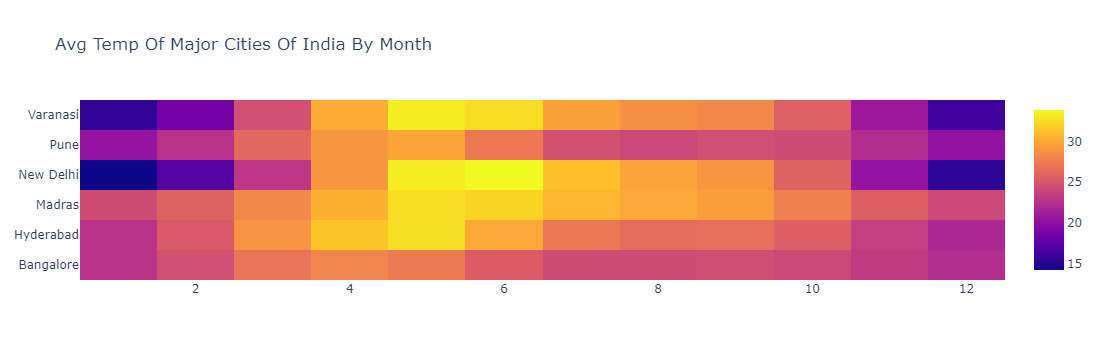

In [223]:
import plotly.graph_objs as go
data = [go.Heatmap(x=data2['month'],
                   y=data2['City'],
                   z=data2['Mean_temp'])]
layout = go.Layout(title='Avg Temp Of Major Cities Of India By Month')
fig = go.Figure(data=data, layout=layout)
fig.show()

## This Heatmap just move forward and see that tempature high and as go last temp goes low.

## x axis is month and y axis is City and Mean_temp in Z axis.

In [225]:
import folium
from folium.plugins import HeatMap

basemap = folium.Map()
basemap

In [226]:
data2.head()

,month,City,Mean_temp,Country,Latitude,Longitude
0,1,Bangalore,22.713981,India,12.05,77.26
2613,2,Bangalore,24.656619,India,12.05,77.26
5226,3,Bangalore,27.062186,India,12.05,77.26
7839,4,Bangalore,27.988517,India,12.05,77.26
10452,5,Bangalore,27.522754,India,12.05,77.26


In [227]:
for id,rows in data2.iterrows():
    print(id)
    print(rows)

0
month                1
City         Bangalore
Mean_temp    22.713981
Country          India
Latitude         12.05
Longitude        77.26
Name: 0, dtype: object
2613
month                2
City         Bangalore
Mean_temp    24.656619
Country          India
Latitude         12.05
Longitude        77.26
Name: 2613, dtype: object
5226
month                3
City         Bangalore
Mean_temp    27.062186
Country          India
Latitude         12.05
Longitude        77.26
Name: 5226, dtype: object
7839
month                4
City         Bangalore
Mean_temp    27.988517
Country          India
Latitude         12.05
Longitude        77.26
Name: 7839, dtype: object
10452
month                5
City         Bangalore
Mean_temp    27.522754
Country          India
Latitude         12.05
Longitude        77.26
Name: 10452, dtype: object
13065
month                6
City         Bangalore
Mean_temp    25.468799
Country          India
Latitude         12.05
Longitude        77.26
Name: 13065, dt

In [230]:
for id,rows in data2.iterrows():
    folium.Marker(location=[rows['Latitude'],rows['Longitude']], popup=rows['Mean_temp']).add_to(basemap)

basemap